<a href="https://colab.research.google.com/github/iris10130901/AI_Project/blob/main/%E9%81%8B%E7%94%A8Selenium%E6%8A%93%E5%8F%96Google_Map%E8%A9%95%E8%AB%96%E8%B3%87%E6%96%99%E9%80%B2%E8%A1%8CNLP%E5%88%86%E6%9E%90_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 蒐集台中市區(東區、西區、南區、北區、中區、西屯區、南屯區、北屯區) 各美食餐廳 
- 選取3.0顆星以上餐廳



# 文字探勘

In [ ]:
import jieba
import csv
import operator
from collections import Counter
import pandas as pd

In [ ]:
jieba.set_dictionary('/content/drive/MyDrive/Colab Notebooks/dataNLP/dict.txt')

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/dataNLP/stop.txt') as f:
    stops = f.read().split('\n')

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/dataNLP')
!pwd 

/content/drive/MyDrive/Colab Notebooks/dataNLP


In [ ]:
import re
import requests
import jieba
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_excel('台中_all.xlsx')
df

,店名,網址,星級,評論,回復,地址
0,麻辣 麻鬥干鍋 喝酒聚會/台中美食/西區晚餐/西區宵夜/西區麻辣/晚餐美食/勤美宵夜/,https://www.google.com.tw/maps/place/%E9%BA%BB...,4.5,239,"['韓國麵好吃，臭豆腐很乾，鴨胗硬到咬不動，其他料都很少，不合個人口味。 ', '推~服務好...",403台中市西區博館三街148號
1,卷卷庵日式料理｜無菜單料理｜生魚片｜台中美食｜｜勤美美食｜審計新村｜台中燒烤店｜現榨生啤酒｜...,https://www.google.com.tw/maps/place/%E5%8D%B7...,4.1,360,"['日式亭園造景，優雅裝潢，賓至如歸的服務，我們點了套餐，廚師的手藝很棒，性價比很高 ', ...",403台中市西區中興街82號
2,卯月居酒屋｜西區居酒屋｜台中居酒屋推薦｜西區美食｜串燒｜,https://www.google.com.tw/maps/place/%E5%8D%AF...,4.7,97,"['好吃到哭…牛肉串、雞肉串、炒水蓮和鮭魚炒飯必點！😍 ', '餐點中規中矩，口味還行就是出...",403台中市西區中美街462號
3,稻·麥食堂,https://www.google.com.tw/maps/place/%E7%A8%BB...,4.5,417,"['松阪豬、無骨雞翅、比目魚丼飯、雞蛋豆腐佐蚵仔降、鴨胸丼飯都表現的不錯，深夜好店 ', '...",403台中市西區五權五街138號
4,Offer Oh昨日花卷 跨界好食,https://www.google.com.tw/maps/place/Offer+Oh%...,4.4,3178,"['餐點很有特色的店家，推薦叫化子雞火烤飯，料多味美 肉又大塊，份量很足夠！ ', '食物精...",403台中市西區忠誠街91號
...,...,...,...,...,...,...
145,禾日常·禾夜常［東區美食］ （早午餐 咖啡廳 餐酒館 精釀酒吧）,https://www.google.com.tw/maps/place/%E7%A6%BE...,4.8,574,"['環境很棒又舒服，特地點了沖繩飯糰好吃， 其他餐點也很棒 值得推薦 ', '我參家愛媽咪月...",401台中市東區自由路四段213號
146,台中高麗屋,https://www.google.com.tw/maps/place/%E5%8F%B0...,4.1,2447,"['下午4點半開始營業 在去黃昏市場買水煮玉米和花田壽司的生魚片跟蟹肉 人生圓滿 ', '銅...",401台中市東區十甲東路
147,幸福小館,https://www.google.com.tw/maps/place/%E5%B9%B8...,4.3,1524,"['韓式泡菜牛肉炒烏龍、什錦炒麵、燴飯類跟鮮蚵湯都好好吃! 料算多分量也不會太少! ', '...",401台中市東區力行路53號
148,金衛亭浮誇壽司首代目,https://www.google.com.tw/maps/place/%E9%87%91...,4.9,3097,['也許是我點錯東西，炸豆腐跟茶碗蒸以及味噌湯、手捲等小菜都比壽司明星餐點令人驚訝\U000...,40151台中市東區自由路四段106號


In [ ]:
df_comment = df['回復']
df_comment 

0      ['韓國麵好吃，臭豆腐很乾，鴨胗硬到咬不動，其他料都很少，不合個人口味。 ', '推~服務好...
1      ['日式亭園造景，優雅裝潢，賓至如歸的服務，我們點了套餐，廚師的手藝很棒，性價比很高 ', ...
2      ['好吃到哭…牛肉串、雞肉串、炒水蓮和鮭魚炒飯必點！😍 ', '餐點中規中矩，口味還行就是出...
3      ['松阪豬、無骨雞翅、比目魚丼飯、雞蛋豆腐佐蚵仔降、鴨胸丼飯都表現的不錯，深夜好店 ', '...
4      ['餐點很有特色的店家，推薦叫化子雞火烤飯，料多味美 肉又大塊，份量很足夠！ ', '食物精...
                             ...                        
145    ['環境很棒又舒服，特地點了沖繩飯糰好吃， 其他餐點也很棒 值得推薦 ', '我參家愛媽咪月...
146    ['下午4點半開始營業 在去黃昏市場買水煮玉米和花田壽司的生魚片跟蟹肉 人生圓滿 ', '銅...
147    ['韓式泡菜牛肉炒烏龍、什錦炒麵、燴飯類跟鮮蚵湯都好好吃! 料算多分量也不會太少! ', '...
148    ['也許是我點錯東西，炸豆腐跟茶碗蒸以及味噌湯、手捲等小菜都比壽司明星餐點令人驚訝\U000...
149    ['海鮮與飯的份量十足，蝦子和鮭魚很鮮 牛蒡絲略鹹 店內裝潢環境很好，非常舒服且乾淨 ', ...
Name: 回復, Length: 150, dtype: object

In [ ]:
import pandas as pd
df1 = pd.read_csv('台中回復 1.csv', encoding='utf-8-sig')
df1

,comment
0,"['韓國麵好吃，臭豆腐很乾，鴨胗硬到咬不動，其他料都很少，不合個人口味。 ', '推~服務好..."
1,"['日式亭園造景，優雅裝潢，賓至如歸的服務，我們點了套餐，廚師的手藝很棒，性價比很高 ', ..."
2,"['好吃到哭…牛肉串、雞肉串、炒水蓮和鮭魚炒飯必點！😍 ', '餐點中規中矩，口味還行就是出..."
3,"['松阪豬、無骨雞翅、比目魚丼飯、雞蛋豆腐佐蚵仔降、鴨胸丼飯都表現的不錯，深夜好店 ', '..."
4,"['餐點很有特色的店家，推薦叫化子雞火烤飯，料多味美 肉又大塊，份量很足夠！ ', '食物精..."
...,...
145,"['環境很棒又舒服，特地點了沖繩飯糰好吃， 其他餐點也很棒 值得推薦 ', '我參家愛媽咪月..."
146,"['下午4點半開始營業 在去黃昏市場買水煮玉米和花田壽司的生魚片跟蟹肉 人生圓滿 ', '銅..."
147,"['韓式泡菜牛肉炒烏龍、什錦炒麵、燴飯類跟鮮蚵湯都好好吃! 料算多分量也不會太少! ', '..."
148,['也許是我點錯東西，炸豆腐跟茶碗蒸以及味噌湯、手捲等小菜都比壽司明星餐點令人驚訝\U000...


In [ ]:
with open('台中回復 1.csv',encoding='utf-8-sig') as csvfile:
  rows = csv.reader(csvfile)
  for row in rows:
        row = str(row)
        #刪除無意義字
        row = row.replace("n","") 
        row = row.replace("\\","")
        row = row.replace(" ","")
        row = row.replace("'","")
        row = row.replace("、","")
        row = row.replace("[","")
        row = row.replace("]","")
        row = row.replace("（","")
        row = row.replace("）","")
        row = row.replace("《","")
        row = row.replace("》","")
        row = row.replace("～","")


        corpus = []                # corpus 語料庫
        # 開始結jieba分詞並去除不要的字
        # cut_all=False 精确模式
        corpus += [t for t in jieba.cut(row, cut_all=False) if t not in stops]
        # 創個空的dictionary
        dic = {}
        for ele in corpus:
            if ele not in dic:
                dic[ele] = 1
            else:
                dic[ele] = dic[ele] + 1
        # 顯示切字的結果
        sorted_word = sorted(dic.items(), key=operator.itemgetter(1), reverse=True)
        print(sorted_word)
        with open('gm1.csv', 'a', encoding='utf-8-sig') as wf2:
            for ele in sorted_word:
                # 這行是表示我要2個字以上的句子
                if len(ele[0]) >= 2:
                    world = ele[0] + ','
                    wf2.write(world)

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/dataNLP/dict.txt ...
Dumping model to file cache /tmp/jieba.u4ec78da610829c15e42042d8a054c06a.cache
Loading model cost 1.443 seconds.
Prefix dict has been built successfully.


[('commet', 1)]
[('"', 2), ('很', 2), ('好', 2), ('韓國', 1), ('麵', 1), ('好吃', 1), ('臭豆腐', 1), ('乾', 1), ('鴨', 1), ('胗', 1), ('硬', 1), ('到', 1), ('咬不動', 1), ('其', 1), ('他料', 1), ('很少', 1), ('不合', 1), ('個', 1), ('人', 1), ('口味', 1), ('推', 1), ('~', 1), ('服務', 1), ('品質', 1), ('店員', 1), ('也', 1), ('親切', 1), ('出餐', 1), ('速度', 1), ('快', 1), ('配', 1), ('啤酒', 1), ('一級', 1), ('棒', 1), ('叫', 1), ('UE', 1), ('外送', 1), ('餐點', 1), ('除了', 1), ('麻跟辣', 1), ('之外', 1), ('完全', 1), ('不', 1), ('鹹', 1), ('如果', 1), ('有', 1), ('胡椒鹽', 1), ('應該', 1), ('要', 1), ('另外', 1), ('包一', 1), ('包給', 1), ('顧客', 1)]
[('有', 3), ('"', 2), ('套餐', 2), ('很', 2), ('日式', 1), ('亭園', 1), ('造景', 1), ('優雅', 1), ('裝潢', 1), ('賓至如歸', 1), ('服務', 1), ('點了', 1), ('廚師', 1), ('手藝', 1), ('很棒', 1), ('性價', 1), ('比', 1), ('高', 1), ('餐點', 1), ('鍋物', 1), ('也', 1), ('類似', 1), ('居酒屋', 1), ('菜式', 1), ('單點', 1), ('菜色', 1), ('可以', 1), ('選擇', 1), ('老闆', 1), ('就是', 1), ('主廚', 1), ('店面', 1), ('小', 1), ('但', 1), ('長廊', 1), ('型', 1), ('設計', 1), ('風格', 1)]
[('"',

In [ ]:
house = open('gm1.csv', encoding='utf-8-sig').read()
# 將讀取的檔案內之字單獨分開
list1 = house.split(',')
# 計算出現次數
dir1 = Counter(list1)

In [ ]:
list1

['韓國',
 '好吃',
 '臭豆腐',
 '咬不動',
 '他料',
 '很少',
 '不合',
 '口味',
 '服務',
 '品質',
 '店員',
 '親切',
 '出餐',
 '速度',
 '啤酒',
 '一級',
 'UE',
 '外送',
 '餐點',
 '除了',
 '麻跟辣',
 '之外',
 '完全',
 '如果',
 '胡椒鹽',
 '應該',
 '另外',
 '包一',
 '包給',
 '顧客',
 '套餐',
 '日式',
 '亭園',
 '造景',
 '優雅',
 '裝潢',
 '賓至如歸',
 '服務',
 '點了',
 '廚師',
 '手藝',
 '很棒',
 '性價',
 '餐點',
 '鍋物',
 '類似',
 '居酒屋',
 '菜式',
 '單點',
 '菜色',
 '可以',
 '選擇',
 '老闆',
 '就是',
 '主廚',
 '店面',
 '長廊',
 '設計',
 '風格',
 '好吃',
 '牛肉',
 '雞肉',
 '水蓮',
 '鮭魚',
 '炒飯',
 '必點',
 '餐點',
 '中規中矩',
 '口味',
 '還行',
 '就是',
 '出餐',
 '較慢',
 '空間',
 '位置',
 '不多',
 '提早',
 '訂位',
 '老闆',
 '非常',
 '親切',
 '慶功',
 '最佳',
 '選擇',
 '樓下',
 '包廂',
 '舒適',
 '食物',
 '丼飯',
 '豆腐',
 '松阪豬',
 '無骨',
 '雞翅',
 '比目魚',
 '雞蛋',
 '蚵仔',
 '鴨胸',
 '表現',
 '不錯',
 '深夜',
 '好店',
 '日法',
 '混血',
 '料理',
 '餐廳',
 '價位',
 '平實',
 '主打',
 '飯類',
 '以及',
 '創意',
 '小菜',
 '適合',
 '週末',
 '小酌',
 '三五',
 '好友',
 '聚會',
 '隱身',
 '巷弄',
 '文青',
 '日式',
 '料多',
 '味美',
 '老闆娘',
 '親切',
 '鮮蚵',
 '店內',
 '餐點',
 '特色',
 '店家',
 '推薦',
 '叫化',
 '子雞',
 '火烤',
 '料多',
 '味美肉',
 '大塊',
 '份量',
 '足夠',
 '食物',


In [ ]:
dir1

Counter({'韓國': 12,
         '好吃': 392,
         '臭豆腐': 8,
         '咬不動': 4,
         '他料': 4,
         '很少': 4,
         '不合': 4,
         '口味': 180,
         '服務': 192,
         '品質': 48,
         '店員': 60,
         '親切': 124,
         '出餐': 32,
         '速度': 40,
         '啤酒': 12,
         '一級': 8,
         'UE': 4,
         '外送': 4,
         '餐點': 204,
         '除了': 4,
         '麻跟辣': 4,
         '之外': 8,
         '完全': 12,
         '如果': 12,
         '胡椒鹽': 4,
         '應該': 4,
         '另外': 8,
         '包一': 4,
         '包給': 4,
         '顧客': 8,
         '套餐': 96,
         '日式': 56,
         '亭園': 4,
         '造景': 12,
         '優雅': 4,
         '裝潢': 100,
         '賓至如歸': 4,
         '點了': 56,
         '廚師': 12,
         '手藝': 8,
         '很棒': 64,
         '性價': 8,
         '鍋物': 12,
         '類似': 8,
         '居酒屋': 8,
         '菜式': 4,
         '單點': 28,
         '菜色': 64,
         '可以': 100,
         '選擇': 44,
         '老闆': 100,
         '就是': 20,
         '主廚': 16,
   

In [ ]:
# 將值寫入csv檔中
with open('gm2.csv', encoding='utf-8-sig', mode='w') as fp:
    fp.write('關鍵字,值,\n')
    for tag, count in dir1.items():
        fp.write('{},{}\n'.format(tag, count))

In [ ]:
df2 = pd.read_csv('gm2.csv', index_col="值")
df2

,關鍵字,Unnamed: 2
值,,
12,韓國,NaN
392,好吃,NaN
8,臭豆腐,NaN
4,咬不動,NaN
4,他料,NaN
...,...,...
4,繽紛,NaN
4,配合,NaN
4,裝飾,NaN


In [ ]:
df2 = df2.sort_index(axis=0, ascending=False)[:10]
df2

,關鍵字,Unnamed: 2
值,,
392,好吃,NaN
228,評論,NaN
204,餐點,NaN
192,推薦,NaN
192,服務,NaN
184,環境,NaN
180,不錯,NaN
180,口味,NaN
168,份量,NaN


Building prefix dict from /content/drive/MyDrive/Colab Notebooks/dataNLP/dict.txt ...
Loading model from cache /tmp/jieba.u4ec78da610829c15e42042d8a054c06a.cache
Loading model cost 0.662 seconds.
Prefix dict has been built successfully.


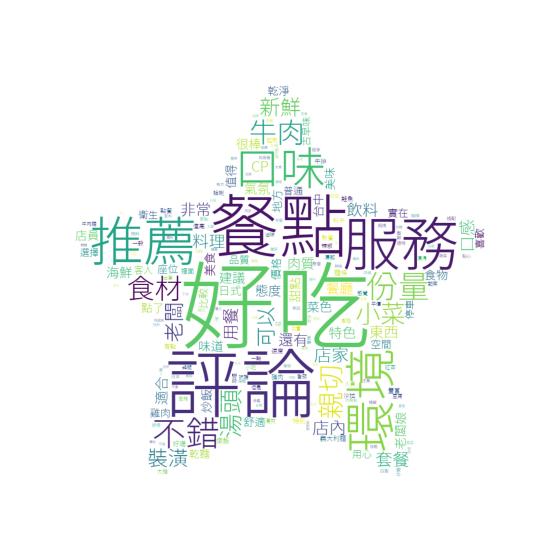

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from collections import Counter
from PIL import Image
import numpy as np
import requests
text = open('gm1.csv', "r",encoding="utf-8").read()
jieba.set_dictionary('dict.txt')
#with open('stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:
with open('stop.txt', 'r', encoding='utf-8-sig') as f:
    stops = f.read().split('\n')   
terms = []
for t in jieba.cut(text, cut_all=False):
    if t not in stops:
        terms.append(t)
diction = Counter(terms)
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)
#wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
mask = np.array(Image.open("star2.jpg")) 
wordcloud = WordCloud(background_color="white",mask=mask,font_path='taipei_sans_tc_beta.ttf') 
wordcloud.generate_from_frequencies(frequencies=diction)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("bookCloud.png")

# 情緒分析

In [ ]:
!pip install snownlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 37.6 MB 1.2 MB/s 
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760963 sha256=680279d4a7e5b07172bdb7d460f931c5619ef89ab37ac842e0c48a44d71b3235
  Stored in directory: /root/.cache/pip/wheels/4a/7a/fe/a5747434679b22a95c93bcf9fa49a988f5d9be56366bdf6c79
Successfully built snownlp


In [ ]:
from snownlp import SnowNLP
from snownlp import sentiment
from snownlp import seg
import pandas as pd

## 1 . 舊台中市區(8區)

In [ ]:
df3  = pd.read_csv('台中回復 1.csv', encoding='utf-8-sig')
df3

,comment
0,"['韓國麵好吃，臭豆腐很乾，鴨胗硬到咬不動，其他料都很少，不合個人口味。 ', '推~服務好..."
1,"['日式亭園造景，優雅裝潢，賓至如歸的服務，我們點了套餐，廚師的手藝很棒，性價比很高 ', ..."
2,"['好吃到哭…牛肉串、雞肉串、炒水蓮和鮭魚炒飯必點！😍 ', '餐點中規中矩，口味還行就是出..."
3,"['松阪豬、無骨雞翅、比目魚丼飯、雞蛋豆腐佐蚵仔降、鴨胸丼飯都表現的不錯，深夜好店 ', '..."
4,"['餐點很有特色的店家，推薦叫化子雞火烤飯，料多味美 肉又大塊，份量很足夠！ ', '食物精..."
...,...
145,"['環境很棒又舒服，特地點了沖繩飯糰好吃， 其他餐點也很棒 值得推薦 ', '我參家愛媽咪月..."
146,"['下午4點半開始營業 在去黃昏市場買水煮玉米和花田壽司的生魚片跟蟹肉 人生圓滿 ', '銅..."
147,"['韓式泡菜牛肉炒烏龍、什錦炒麵、燴飯類跟鮮蚵湯都好好吃! 料算多分量也不會太少! ', '..."
148,['也許是我點錯東西，炸豆腐跟茶碗蒸以及味噌湯、手捲等小菜都比壽司明星餐點令人驚訝\U000...


In [ ]:
# sentiment = []
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments

In [ ]:
df3['sentiment'] = df3.comment.apply(get_sentiment_cn)
df3['sentiment']

0      7.353800e-08
1      5.251818e-06
2      3.610525e-06
3      3.627647e-05
4      5.625653e-06
           ...     
145    1.542632e-02
146    4.703140e-10
147    1.933602e-10
148    1.042214e-02
149    2.506617e-06
Name: sentiment, Length: 150, dtype: float64

In [ ]:
df3.head()

,comment,sentiment
0,"['韓國麵好吃，臭豆腐很乾，鴨胗硬到咬不動，其他料都很少，不合個人口味。 ', '推~服務好...",7.353800e-08
1,"['日式亭園造景，優雅裝潢，賓至如歸的服務，我們點了套餐，廚師的手藝很棒，性價比很高 ', ...",5.251818e-06
2,"['好吃到哭…牛肉串、雞肉串、炒水蓮和鮭魚炒飯必點！😍 ', '餐點中規中矩，口味還行就是出...",3.610525e-06
3,"['松阪豬、無骨雞翅、比目魚丼飯、雞蛋豆腐佐蚵仔降、鴨胸丼飯都表現的不錯，深夜好店 ', '...",3.627647e-05
4,"['餐點很有特色的店家，推薦叫化子雞火烤飯，料多味美 肉又大塊，份量很足夠！ ', '食物精...",5.625653e-06


In [ ]:
content1 = df['回復'][0]
content1

"['韓國麵好吃，臭豆腐很乾，鴨胗硬到咬不動，其他料都很少，不合個人口味。 ', '推~服務好品質好，店員也很親切，出餐速度快，配啤酒一級棒 ', '叫UE外送的餐點，除了麻跟辣之外完全不鹹。如果有胡椒鹽應該要另外包一包給顧客。 ']"

In [ ]:
import pandas as pd
import re

# 讀取資料
df = pd.read_excel('台中_all.xlsx')
# print(df.info())
# 去掉空值的列
df = df.dropna(axis=0)
content = df['回復']

# 去除一些無用的字元 只提取出中文出來
content = [''.join(re.findall('[\u4e00-\u9fa5]+', item, re.S)) for item in content]
scores = [SnowNLP(i).sentiments for i in content]
emotions = []
for i in scores:
    if i >= 0.75:
        emotions.append('好評')
    elif 0.45 <= i < 0.75:
        emotions.append('中評')
    else:
        emotions.append('差評')

df['情緒分數'] = scores
df['評價'] = emotions
df.to_excel('NLP_COMMENT.xlsx')

In [ ]:
df['情緒分數'].describe()

count    1.500000e+02
mean     3.763407e-01
std      4.319823e-01
min      8.817573e-10
25%      9.178495e-04
50%      9.988249e-02
75%      9.432710e-01
max      9.999995e-01
Name: 情緒分數, dtype: float64

In [ ]:
df['情緒分數'].mean() 

0.37634065895539215

In [ ]:
df['情緒分數'].median()

0.099882492054581

In [ ]:
df[:10]

,店名,網址,星級,評論,回復,地址,情緒分數,評價
0,麻辣 麻鬥干鍋 喝酒聚會/台中美食/西區晚餐/西區宵夜/西區麻辣/晚餐美食/勤美宵夜/,https://www.google.com.tw/maps/place/%E9%BA%BB...,4.5,239,"['韓國麵好吃，臭豆腐很乾，鴨胗硬到咬不動，其他料都很少，不合個人口味。 ', '推~服務好...",403台中市西區博館三街148號,0.002805,差評
1,卷卷庵日式料理｜無菜單料理｜生魚片｜台中美食｜｜勤美美食｜審計新村｜台中燒烤店｜現榨生啤酒｜...,https://www.google.com.tw/maps/place/%E5%8D%B7...,4.1,360,"['日式亭園造景，優雅裝潢，賓至如歸的服務，我們點了套餐，廚師的手藝很棒，性價比很高 ', ...",403台中市西區中興街82號,0.039043,差評
2,卯月居酒屋｜西區居酒屋｜台中居酒屋推薦｜西區美食｜串燒｜,https://www.google.com.tw/maps/place/%E5%8D%AF...,4.7,97,"['好吃到哭…牛肉串、雞肉串、炒水蓮和鮭魚炒飯必點！😍 ', '餐點中規中矩，口味還行就是出...",403台中市西區中美街462號,0.599081,中評
3,稻·麥食堂,https://www.google.com.tw/maps/place/%E7%A8%BB...,4.5,417,"['松阪豬、無骨雞翅、比目魚丼飯、雞蛋豆腐佐蚵仔降、鴨胸丼飯都表現的不錯，深夜好店 ', '...",403台中市西區五權五街138號,0.500484,中評
4,Offer Oh昨日花卷 跨界好食,https://www.google.com.tw/maps/place/Offer+Oh%...,4.4,3178,"['餐點很有特色的店家，推薦叫化子雞火烤飯，料多味美 肉又大塊，份量很足夠！ ', '食物精...",403台中市西區忠誠街91號,0.005798,差評
5,日香粿店/台中美食/台中小吃/台中碗粿/台中四神湯/台中粿店/西區美食/西區小吃/西區必吃,https://www.google.com.tw/maps/place/%E6%97%A5...,4.5,160,"['用餐環境舒適環境乾淨，碗粿好吃餡料豐富實在，綜合湯湯頭清甜料多多！cp值好高！ ', '...",403台中市西區大同街208號,0.011184,差評
6,遊牧餐桌Nomadic Trattoria,https://www.google.com.tw/maps/place/%E9%81%8A...,4.7,457,"['文青風～然後有兩隻可愛爆表小橘貓！餐點的話推薦豬腳，羊排肉質比較柴。配菜都不錯～ ', ...",403台中市西區忠勤街184號,0.769322,好評
7,小弄拉麵,https://www.google.com.tw/maps/place/%E5%B0%8F...,4.4,627,"['超大豬肋排和濃郁湯頭，小菜也很好吃，點餐用蓋章的很特別，店面很有日本風 ', '驚艷的拉...",403台中市西區向上南路一段74號,0.020311,差評
8,饕之鄉李姐的店,https://www.google.com.tw/maps/place/%E9%A5%95...,4.0,3944,"['店內每樣東西都好吃 小菜超棒的 最喜歡鮭魚炒飯跟青菜蛋花湯 ', '湯包普通，豬肉捲餅太...",403台中市西區向上路一段353號,0.249653,差評
9,嗎哪關東煮,https://www.google.com.tw/maps/place/%E5%97%8E...,4.3,541,"['很可愛的巷弄小店，裝潢古色古香，關東煮食材種類很多，很多少見食材，辣味湯頭很特別 ', ...",403台中市西區美村路一段164巷15號,0.021264,差評


In [ ]:
df['評價'].value_counts()

差評    93
好評    48
中評     9
Name: 評價, dtype: int64

##2 .  台中市全區

### 2.1 資料整理:找出沒有回復的店家

In [ ]:
fliter = (test1['回復'] == "[]")
test1[fliter]

,店名,網址,星級,評論,回復,地址
8,台中威汀城市酒店,https://www.google.com.tw/maps/place/%E5%8F%B0...,4.2,1536,[],428台中市大雅區民生路一段100號
35,福容大飯店 麗寶樂園,https://www.google.com.tw/maps/place/%E7%A6%8F...,4.3,4030,[],421台中市后里區福容路88號
130,梨山賓館,https://www.google.com.tw/maps/place/%E6%A2%A8...,4.1,6634,[],424台中市和平區中正路91號
131,神木谷假期大飯店,https://www.google.com.tw/maps/place/%E7%A5%9E...,4.1,1426,[],424台中市和平區東關路一段溫泉巷7號
138,彩虹山舍,https://www.google.com.tw/maps/place/%E5%BD%A9...,4.3,584,[],422台中市石岡區和盛街南眉巷10號
145,桃李河畔,https://www.google.com.tw/maps/place/%E6%A1%83...,4.3,2729,[],426台中市新社區中興街98-1號
163,紅點文旅,https://www.google.com.tw/maps/place/%E7%B4%85...,4.3,1388,[],400台中市中區民族路206號
166,台中富信大飯店,https://www.google.com.tw/maps/place/%E5%8F%B0...,4.1,1042,[],400台中市中區市府路14號
167,CHECK inn 雀客旅館台中市府,https://www.google.com.tw/maps/place/CHECK+inn...,4.4,1693,[],400台中市中區市府路38號
169,新盛橋行旅S.S.B-Hotel,https://www.google.com.tw/maps/place/%E6%96%B0...,4.4,842,[],400台中市中區中山路26號


## 2.2 刪除資料

In [ ]:
test1 = test1[-test1.回復.isin(['[]'])]
test1

,店名,網址,星級,評論,回復,地址
0,王田鵝肉,https://www.google.com.tw/maps/place/%E7%8E%8B...,4.3,1177,"['湯冬粉麵好吃，吸滿湯汁的麵條一碗覺得不夠，燙空心菜鮮綠脆嫩', '南下王田交流道下去很近...",432台中市大肚區沙田路一段260號
1,品香手工肉包,https://www.google.com.tw/maps/place/%E5%93%81...,4.3,735,"['小孩喜歡筍肉包， 爸爸喜歡鮮肉包， 媽媽喜歡芋頭饅頭（有顆粒比黑糖饅頭香）', '旅途經...",432台中市大肚區沙田路一段813號
2,大肚夜市,https://www.google.com.tw/maps/place/%E5%A4%A7...,4.1,1183,"['美食推薦：胡椒餅（拔絲起司超棒）、藥燉排骨、蚵仔麵線…！', '地方的小夜市，在地人我星...",432台中市大肚區榮華街24號
3,台中大肚區自強早市,https://www.google.com.tw/maps/place/%E5%8F%B0...,4.1,1572,"['＃蔬果瓜豆薯菇（鮮花）不缺，豆腐，素食，丸子，燒烤滷味，麵條水餃混沌皮都到。', '有好...",432台中市大肚區遊園路二段203巷3弄
4,蒙古草原養生麻辣火鍋,https://www.google.com.tw/maps/place/%E8%92%99...,4.3,815,"['湯頭好，菜多，有咖啡、烏梅汁、可樂、明治冰淇淋。', '飽。😋😋😋 佐料區，有辣椒蒜泥蔥...",428台中市大雅區雅環路二段145號
...,...,...,...,...,...,...
891,外環309,https://www.google.com.tw/maps/place/%E5%A4%96...,4.2,1121,"['廣州炒飯、鮮蝦腐皮卷、糯米雞、烤脆皮雞、港式蘿蔔糕 都很好吃。', '這裡的台菜港菜各方...",420台中市豐原區豐原大道一段309號
892,陶板屋 豐原向陽店,https://www.google.com.tw/maps/place/%E9%99%B6...,4.1,1657,"['餐點好吃很貼心服務照顧小朋友的需求，值得推薦，謝謝店家的用心', '停車不方便，但內部裝...",420台中市豐原區向陽路130號B1-2
893,信義大腸豬血湯,https://www.google.com.tw/maps/place/%E4%BF%A1...,4.2,594,"['梅花肉有點像拉麵的叉燒，還不錯吃，只是醬汁不多不夠下飯，米飯口感我不愛所以沒吃完', '...",420台中市豐原區信義街41-1號
894,史提克牛排豐原店,https://www.google.com.tw/maps/place/%E5%8F%B2...,4.7,3879,"['美式排餐，餐點不錯，氣氛好,但部分肉品有醃漬過，喜歡原味的請注意。', '服務超讚，牛排...",420台中市豐原區圓環東路419號


## 2.3 進行snowNLP

In [ ]:
import pandas as pd
import re

# test1 = pd.read_csv('all_csv.csv',encoding='utf-8-sig')

test1 = test1.dropna(axis=0)
content1 = test1['回復']


content1 = [''.join(re.findall('[\u4e00-\u9fa5]+', item, re.S)) for item in content1]
scores1 = [SnowNLP(i).sentiments for i in content1]
emotions1 = []
for i in scores1:
    if i >= 0.75:
        emotions1.append('好評')
    elif 0.45 <= i < 0.75:
        emotions1.append('中評')
    else:
        emotions1.append('差評')

test1['分數'] = scores1
test1['評價'] = emotions1
test1.to_csv('NLP_COMMENT_3.csv')

In [ ]:
test1

,店名,網址,星級,評論,回復,地址,分數,評價
0,王田鵝肉,https://www.google.com.tw/maps/place/%E7%8E%8B...,4.3,1177,"['湯冬粉麵好吃，吸滿湯汁的麵條一碗覺得不夠，燙空心菜鮮綠脆嫩', '南下王田交流道下去很近...",432台中市大肚區沙田路一段260號,0.253676,差評
1,品香手工肉包,https://www.google.com.tw/maps/place/%E5%93%81...,4.3,735,"['小孩喜歡筍肉包， 爸爸喜歡鮮肉包， 媽媽喜歡芋頭饅頭（有顆粒比黑糖饅頭香）', '旅途經...",432台中市大肚區沙田路一段813號,0.005847,差評
2,大肚夜市,https://www.google.com.tw/maps/place/%E5%A4%A7...,4.1,1183,"['美食推薦：胡椒餅（拔絲起司超棒）、藥燉排骨、蚵仔麵線…！', '地方的小夜市，在地人我星...",432台中市大肚區榮華街24號,0.986092,好評
3,台中大肚區自強早市,https://www.google.com.tw/maps/place/%E5%8F%B0...,4.1,1572,"['＃蔬果瓜豆薯菇（鮮花）不缺，豆腐，素食，丸子，燒烤滷味，麵條水餃混沌皮都到。', '有好...",432台中市大肚區遊園路二段203巷3弄,0.000083,差評
4,蒙古草原養生麻辣火鍋,https://www.google.com.tw/maps/place/%E8%92%99...,4.3,815,"['湯頭好，菜多，有咖啡、烏梅汁、可樂、明治冰淇淋。', '飽。😋😋😋 佐料區，有辣椒蒜泥蔥...",428台中市大雅區雅環路二段145號,0.026050,差評
...,...,...,...,...,...,...,...,...
891,外環309,https://www.google.com.tw/maps/place/%E5%A4%96...,4.2,1121,"['廣州炒飯、鮮蝦腐皮卷、糯米雞、烤脆皮雞、港式蘿蔔糕 都很好吃。', '這裡的台菜港菜各方...",420台中市豐原區豐原大道一段309號,0.938927,好評
892,陶板屋 豐原向陽店,https://www.google.com.tw/maps/place/%E9%99%B6...,4.1,1657,"['餐點好吃很貼心服務照顧小朋友的需求，值得推薦，謝謝店家的用心', '停車不方便，但內部裝...",420台中市豐原區向陽路130號B1-2,0.139586,差評
893,信義大腸豬血湯,https://www.google.com.tw/maps/place/%E4%BF%A1...,4.2,594,"['梅花肉有點像拉麵的叉燒，還不錯吃，只是醬汁不多不夠下飯，米飯口感我不愛所以沒吃完', '...",420台中市豐原區信義街41-1號,0.012699,差評
894,史提克牛排豐原店,https://www.google.com.tw/maps/place/%E5%8F%B2...,4.7,3879,"['美式排餐，餐點不錯，氣氛好,但部分肉品有醃漬過，喜歡原味的請注意。', '服務超讚，牛排...",420台中市豐原區圓環東路419號,0.003735,差評


In [ ]:
test1[['店名','星級','回復','分數','評價']]

,店名,星級,回復,分數,評價
0,王田鵝肉,4.3,"['湯冬粉麵好吃，吸滿湯汁的麵條一碗覺得不夠，燙空心菜鮮綠脆嫩', '南下王田交流道下去很近...",0.253676,差評
1,品香手工肉包,4.3,"['小孩喜歡筍肉包， 爸爸喜歡鮮肉包， 媽媽喜歡芋頭饅頭（有顆粒比黑糖饅頭香）', '旅途經...",0.005847,差評
2,大肚夜市,4.1,"['美食推薦：胡椒餅（拔絲起司超棒）、藥燉排骨、蚵仔麵線…！', '地方的小夜市，在地人我星...",0.986092,好評
3,台中大肚區自強早市,4.1,"['＃蔬果瓜豆薯菇（鮮花）不缺，豆腐，素食，丸子，燒烤滷味，麵條水餃混沌皮都到。', '有好...",0.000083,差評
4,蒙古草原養生麻辣火鍋,4.3,"['湯頭好，菜多，有咖啡、烏梅汁、可樂、明治冰淇淋。', '飽。😋😋😋 佐料區，有辣椒蒜泥蔥...",0.026050,差評
...,...,...,...,...,...
891,外環309,4.2,"['廣州炒飯、鮮蝦腐皮卷、糯米雞、烤脆皮雞、港式蘿蔔糕 都很好吃。', '這裡的台菜港菜各方...",0.938927,好評
892,陶板屋 豐原向陽店,4.1,"['餐點好吃很貼心服務照顧小朋友的需求，值得推薦，謝謝店家的用心', '停車不方便，但內部裝...",0.139586,差評
893,信義大腸豬血湯,4.2,"['梅花肉有點像拉麵的叉燒，還不錯吃，只是醬汁不多不夠下飯，米飯口感我不愛所以沒吃完', '...",0.012699,差評
894,史提克牛排豐原店,4.7,"['美式排餐，餐點不錯，氣氛好,但部分肉品有醃漬過，喜歡原味的請注意。', '服務超讚，牛排...",0.003735,差評


In [ ]:
test1['分數'].describe()

count    8.830000e+02
mean     4.927097e-01
std      4.423489e-01
min      2.975620e-11
25%      4.470797e-03
50%      4.755970e-01
75%      9.932532e-01
max      1.000000e+00
Name: 分數, dtype: float64

In [ ]:
test1['評價'].value_counts()

差評    437
好評    375
中評     71
Name: 評價, dtype: int64